###  Kümeleme (Clustering) 

Kümeleme, gözetimsiz öğrenme (unsupervised learning) yöntemlerinden biridir. Temel amacı, verisetinde **etiket olmadan benzer özelliklere sahip örnekleri gruplamaktır.** (Etiket; bir veriye ait sonuç, sınıf ya da hedef değişkenidir. Yani modelin neyi tahmin etmeye çalıştığı bilgidir.)

Kümeleme sonucunda, benzer örneklerin bir araya geldiği **kümeler (clusters)** oluşturulur.

---

### K-Means Algoritması Nedir?

K-Means (K-Ortalamalar) algoritması, en yaygın kullanılan kümeleme yöntemlerinden biridir.

####  Adımlar:

1. **K** (kume sayısı) belirlenir.
2. K tane **rastgele merkez (centroid)** seçilir.
3. Her veri noktası, en yakın merkeze atanarak kümeler oluşturulur.
4. Her küme için yeni merkez, o kümedeki noktaların ortalaması alınarak güncellenir.
5. Atamalar değişmeyene kadar adım 3-4 tekrarlanır (veya belirli bir iterasyon sayısına kadar).

---

####  Örnek:
Bir veri setindeki bireyler; **gelir** ve **yaş** gibi iki özellik ile temsil ediliyorsa, K-Means bu bireyleri benzerliklerine göre gruplayarak “benzer profilli bireyler” kümeleri oluşturabilir.

---

#### Dikkat Edilmesi Gerekenler:
- K değeri (kümelerin sayısı) önceden belirlenmelidir.
- Küre şeklindeki kümelerde başarılıdır, karmaşık şekillerde zayıf performans gösterebilir.
- Başlangıç merkezlerinin seçimi sonuçları etkileyebilir.

---

### K-Means Ne Zaman Kullanılır?

- Veride etiket (sınıf) yoksa ama doğal gruplar aranıyorsa,
- Segmentasyon, görsel analiz, anomali tespiti gibi problemler çözülmek isteniyorsa kullanılır.



c:\Users\ugurc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


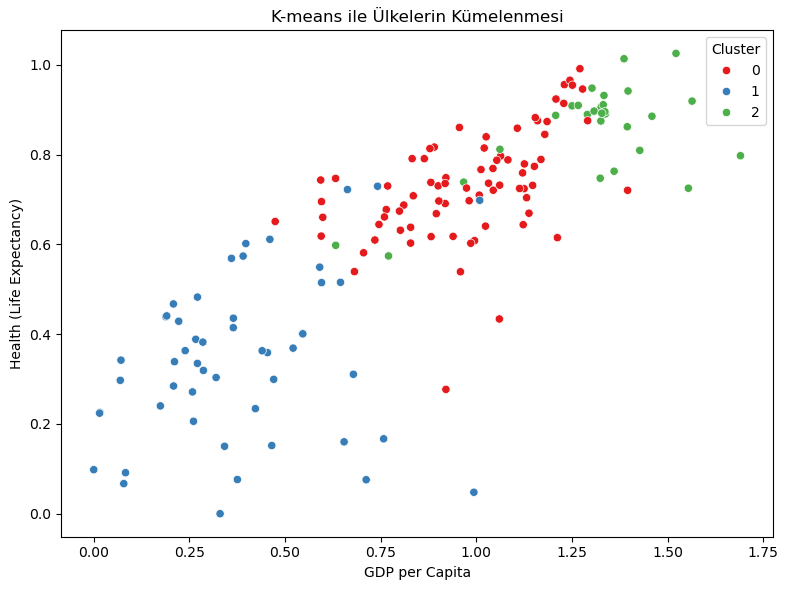


Bölgelere Göre Küme Dağılımı:

Cluster                           0   1   2
Region                                     
Australia and New Zealand         0   0   2
Central and Eastern Europe       26   2   1
Eastern Asia                      5   0   1
Latin America and Caribbean      20   1   1
Middle East and Northern Africa  12   3   5
North America                     0   0   2
Southeastern Asia                 4   3   2
Southern Asia                     1   5   1
Sub-Saharan Africa                3  37   0
Western Europe                    7   0  14

Ülkelerin Kümelere Dağılımı:

          Country                           Region  Cluster
64        Jamaica      Latin America and Caribbean        0
67        Algeria  Middle East and Northern Africa        0
66         Cyprus                   Western Europe        0
65   North Cyprus                   Western Europe        0
104      Honduras      Latin America and Caribbean        0
..            ...                              ..

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv("data.csv")  # Dosya adını kendi ortamına göre düzenle

# 2. Kümeleme için kullanılacak sayısal sütunlar
features = [
    'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
    'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'
]

X = df[features]

# 3. Veriyi ölçekliyoruz (standardizasyon)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. K-means modeli (3 küme ile)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 5. Kümeleri görselleştiriyoruz (GDP vs Health örnek)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Economy (GDP per Capita)',
    y='Health (Life Expectancy)',
    hue='Cluster',
    data=df,
    palette='Set1'
)
plt.title("K-means ile Ülkelerin Kümelenmesi")
plt.xlabel("GDP per Capita")
plt.ylabel("Health (Life Expectancy)")
plt.tight_layout()
plt.show()

# 6. Bölgelere göre kümelenme dağılımı
region_cluster_counts = df.groupby(['Region', 'Cluster']).size().unstack().fillna(0)
region_cluster_counts = region_cluster_counts.astype(int)

print("\nBölgelere Göre Küme Dağılımı:\n")
print(region_cluster_counts)

# 7. Ülke bazında kümelenme sonucu
print("\nÜlkelerin Kümelere Dağılımı:\n")
print(df[['Country', 'Region', 'Cluster']].sort_values(by='Cluster'))


Bulgular:
Kümeler, ekonomik refah ve sağlık gibi temel değişkenler açısından ayrışmaktadır.

Cluster 2:

Genellikle Western Europe ve North America ülkeleri bu kümede yer almaktadır.

Yüksek GDP ve yüksek yaşam beklentisi değerlerine sahiptir.

Cluster 1:

Sub-Saharan Africa, Middle East and North Africa gibi bölgelerden düşük GDP ve sağlık değerine sahip ülkeleri barındırır.

Cluster 0:

Orta seviye GDP ve sağlık puanlarına sahip ülkeler bu kümede yer alır.

Geçiş özellikleri taşıyan ülkelerden oluşur.

c:\Users\ugurc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


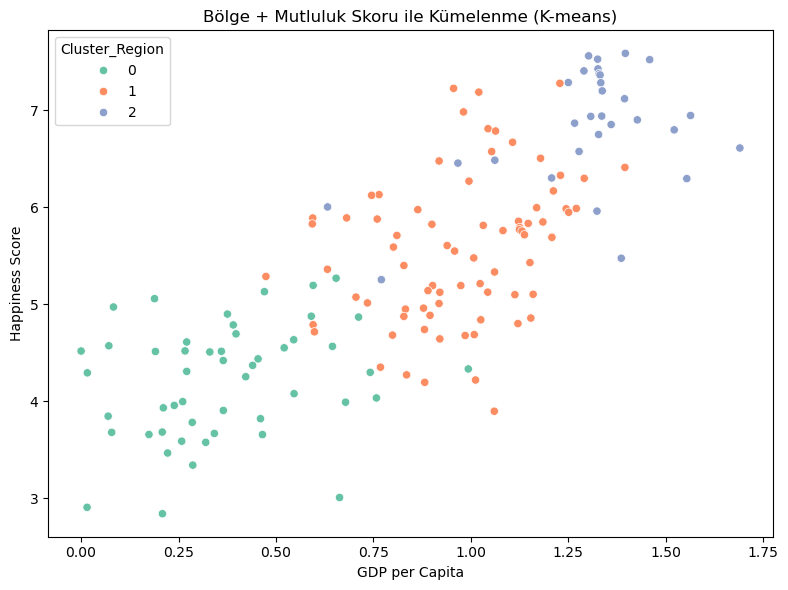

Bölgeye Göre Küme Dağılımı:
Cluster_Region                    0   1   2
Region                                     
Australia and New Zealand         0   0   2
Central and Eastern Europe        2  26   1
Eastern Asia                      0   5   1
Latin America and Caribbean       1  20   1
Middle East and Northern Africa   2  13   5
North America                     0   0   2
Southeastern Asia                 3   4   2
Southern Asia                     5   1   1
Sub-Saharan Africa               37   3   0
Western Europe                    0   6  15

Ülke Bazlı Kümeleme Sonuçları:
        Country                           Region  Happiness Score  \
157        Togo               Sub-Saharan Africa            2.839   
129     Georgia       Central and Eastern Europe            4.297   
128     Myanmar                Southeastern Asia            4.307   
77      Nigeria               Sub-Saharan Africa            5.268   
156     Burundi               Sub-Saharan Africa            2.905  

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv("data.csv") 

# 2. Sayısal ve kategorik özellikleri tanımlıyoruuz
numeric_features = [
    'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
    'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'
]
categorical_features = ['Region']

# 3. Pipeline: sayısallar için StandardScaler, kategorikler için OneHotEncoder
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(), categorical_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=3, random_state=42, n_init=10))
])

# 4. Pipeline uygulaması ve küme ataması
df['Cluster_Region'] = pipeline.fit_predict(df[numeric_features + categorical_features])

# 5. Kümeleri görselleştiriyoruz (GDP vs Happiness Score)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Economy (GDP per Capita)',
    y='Happiness Score',
    hue='Cluster_Region',
    data=df,
    palette='Set2'
)
plt.title("Bölge + Mutluluk Skoru ile Kümelenme (K-means)")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.tight_layout()
plt.show()

# 6. Bölge ve küme bazlı dağılım tablosu
region_cluster_table = df.groupby(['Region', 'Cluster_Region']).size().unstack().fillna(0).astype(int)
print("Bölgeye Göre Küme Dağılımı:")
print(region_cluster_table)

# 7. Ülke bazlı kümeleme sonuçları
print("\nÜlke Bazlı Kümeleme Sonuçları:")
print(df[['Country', 'Region', 'Happiness Score', 'Cluster_Region']].sort_values(by='Cluster_Region'))




Bu grafikte, ülkeler GDP per Capita (Kişi Başına Düşen GSYİH) ve Happiness Score (Mutluluk Skoru) eksenlerine yerleştirilmiş ve 3 farklı kümeye (Cluster_Region) göre renklendirilmiştir. Kümeler, ülkelerin hem ekonomik refah düzeylerine hem de mutluluk skorlarına göre K-Means algoritması ile belirlenmiştir.

## Küme 0 (Yeşil):
- GDP ve Mutluluk Skoru açısından en düşük grubu temsil etmektedir.

- Bu kümeye ait ülkeler daha düşük gelir seviyesine ve daha düşük yaşam memnuniyetine sahip.

- Grafik üzerinde sol alt köşede yoğunlaşmıştır.

- Büyük ihtimalle bu kümede Sahra Altı Afrika, Orta Doğu, Güney Asya gibi bölgelerden ülkeler bulunmaktadır.

## Küme 1 (Turuncu):
- Orta düzeyde GDP ve mutluluk skorlarına sahip ülkeleri barındırır.

- Geniş bir dağılıma sahiptir, yani çeşitli bölge ve gelişmişlik düzeylerinden ülkeler içerebilir.

- Grafik üzerinde orta bölgede yoğunlaşmıştır.

- Bu küme bir “geçiş kümesi” gibi davranmaktadır.

- Hem yüksek GDP hem de yüksek mutluluk skoruna sahip ülkelerden oluşmaktadır.

- Grafik üzerinde sağ üst bölgede konumlanmıştır.

- Bu gruba genellikle Batı Avrupa, İskandinav Ülkeleri, Kanada, Avustralya gibi yüksek yaşam kalitesine sahip ülkeler dahildir.

## Genel Değerlendirme:
- Grafik, GDP ve mutluluk skoru arasında pozitif bir ilişki olduğunu açıkça göstermektedir.

- Ekonomik refah arttıkça, ülkelerin mutluluk skorlarının da arttığı gözlenmektedir.

- Kümeleme sonuçları, sosyoekonomik yapıların mutluluğu belirlemede önemli rol oynadığını istatistiksel olarak da desteklemektedir.